In [ ]:
%pip install transformers tensorflow tf-keras matplotlib pandas seaborn
import pandas as pd
import matplotlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

In [2]:
classifier = pipeline("text-classification", 
                      model = "j-hartmann/emotion-english-distilroberta-base", # specific model !
                      return_all_scores = False) # True

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


### Predict emotion scores for all lines in the data


In [3]:
data = pd.read_csv("../../../../cds-lang-data/GoT-scripts/Game_of_Thrones_Script.csv")

In [ ]:
data3 = data.head(18000)

for index, row in data3.iterrows():
        if type(row["Sentence"]) == str:
            predicted_emotion = classifier(row["Sentence"])[0]['label']
            data3.loc[index, "predicted_emotion"] = predicted_emotion



In [ ]:
def plot_season(df, outpath):
    plot = sns.catplot(df, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count", 
                palette = emotion_colors.values(), lengend = False, col_wrap = 4)
    plot.set_axis_labels("", "test")
    plt.savefig(outpath)

def plot_emotion(df, outpath):
    sns.catplot(data3, x = "Season", hue = "Season", col = "predicted_emotion", kind = "count",
                palette = "husl", col_wrap = 4)
    plt.savefig(outpath)


In [8]:
# Define a dictionary mapping emotions to colors
emotion_colors = {"disgust": "purple",
                "surprise": "yellow",
                "neutral": "lightgray",
                "fear": "orange",
                "anger": "red",
                "joy": "green",
                "sadness": "blue"}

# Function to specify color based on emotion
#def color_specifier(emotion):
#    return emotion_colors.get(emotion)


In [11]:
total_counts

Season
Season 1    40
Name: predicted_emotion, dtype: int64

In [22]:
def plot_season(df, emotion_colors):
    total_counts = df.groupby('Season')['predicted_emotion'].value_counts(normalize = True) * 100
    plot = sns.catplot(data = df, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count", 
                palette = emotion_colors.values() , col_wrap = 4) #lengend = False
    plot.set_axis_labels("", "Relative Frequency (%)")
    plot.set_titles("{col_name}")
    plt.show()

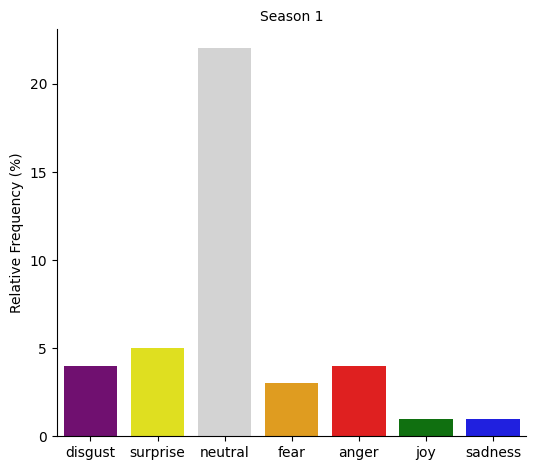

In [23]:
plot_season(data3, emotion_colors)

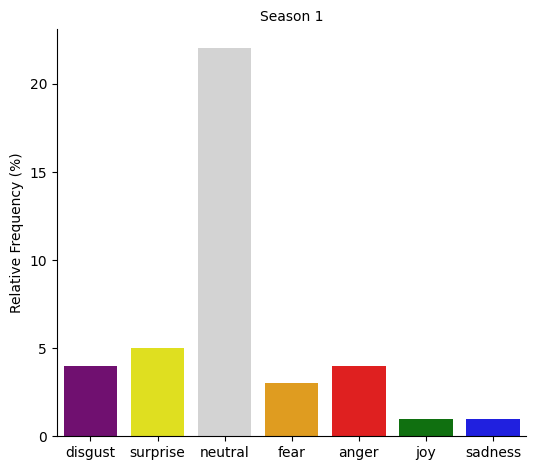

In [18]:
total_counts = data3.groupby('Season')['predicted_emotion'].value_counts(normalize=True) * 100
plot = sns.catplot(data3, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count", 
            palette = emotion_colors.values() , col_wrap = 4) #lengend = False
plot.set_axis_labels("", "Relative Frequency")
plot.set_titles("{col_name}")


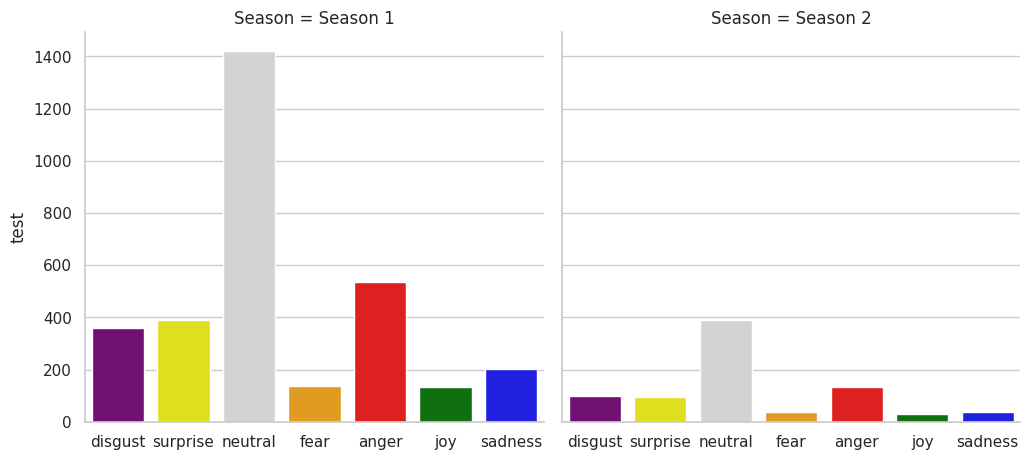

In [49]:
# Apply the color specifier function to the df
#data3["color"] = data3["predicted_emotion"].apply(color_specifier)

plot = sns.catplot(data = data3,
                    x = "predicted_emotion",
                    hue = "color",
                    col = "Season",
                    kind = "count",
                    palette = emotion_colors.values(),
                    legend = False,
                    col_wrap = 4)

plot.set_axis_labels("", "test")
plot.set_axis_labels("", "test")


In [33]:
def plot_emotion(df):
    #total_counts = df.groupby('predicted_emotion')['Season'].value_counts(normalize = True) * 100
    total_counts = df.groupby('Season')['predicted_emotion'].value_counts(normalize = True) * 100
    plot = sns.catplot(data = df, x = "Season", hue = "Season", col = "predicted_emotion", kind = "count",
                    palette = "husl", col_wrap = 4)
    plot.set_axis_labels("", "Relative Frequency")
    plot.set_titles("{col_name}")
    return print("The 'emotion' plot has been saved to the out folder")

The 'emotion' plot has been saved to the out folder


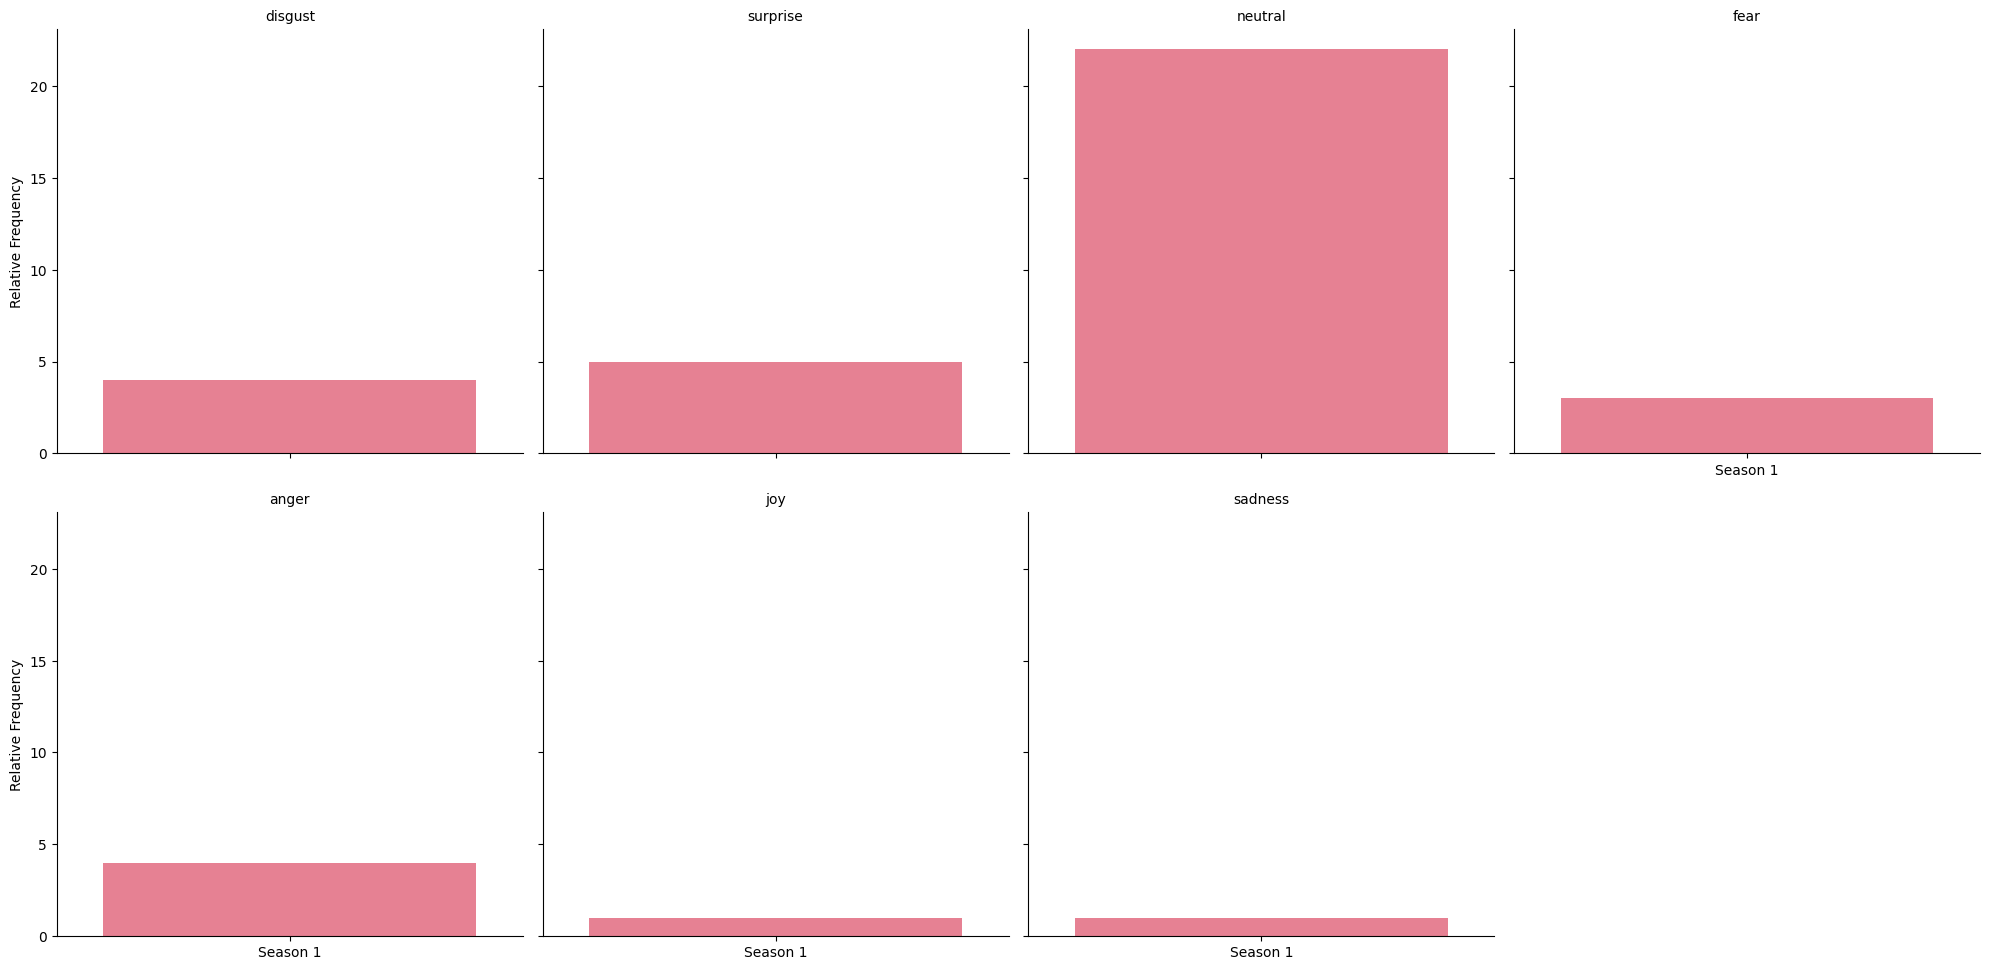

In [34]:
plot_emotion(data3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x800 with 0 Axes>

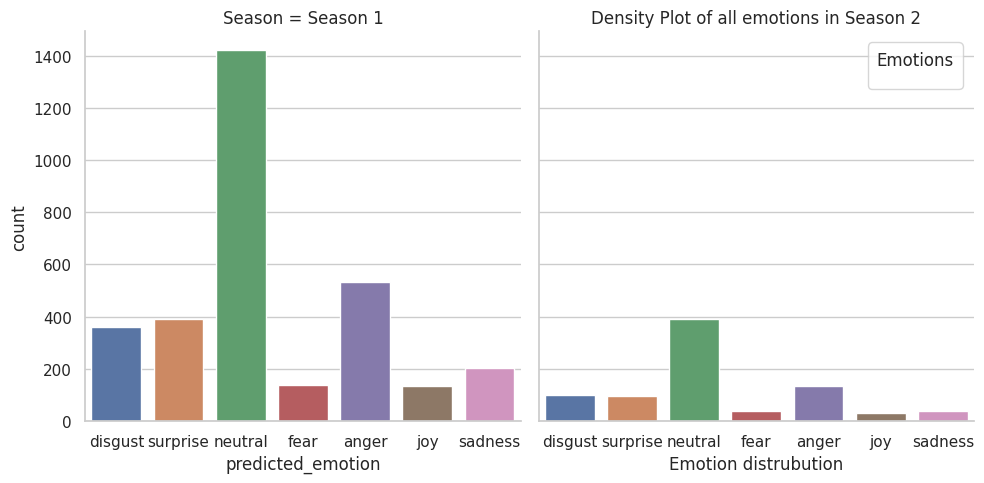

In [18]:
seasons = sorted(data3['Season'].unique())

sns.set(style = "whitegrid")

plt.figure(figsize = (12, 8))

#for season in seasons:
#subset = data3[data3['Season'] == season]
            
sns.catplot(data3, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count")

# Plot formatting
plt.legend(title = 'Emotion', loc = 'upper left')
plt.legend(prop = {'size': 16}, title = 'Emotions')
plt.title(f'Density Plot of all emotions in {season}')
plt.xlabel('Emotion distrubution')
plt.ylabel('Density')


plt.show()

In [ ]:
def reshape_data(df):
    Seasons = list(df.Season.unique())
    season_len = []
    for n in range(len(Seasons)):
        season = Seasons[n]
        season_len = season_len + [len(df.loc[df["Season"] == f"{season}"])]
    data_counts =  df.value_counts().reset_index().rename(columns={"index": "value", 0: "counts"})
    for season, length in zip(Seasons, season_len):
        data_counts.loc[data_counts["Season"] == season, "count"] = data_counts.loc[data_counts["Season"] == season, "count"]/length * 100
    return data_counts

In [ ]:
def rel_freq(count, len_doc = len(doc)): 
    return round((count/len_doc * 10000), 2)

In [ ]:
# Calculate the real freq directly within the plotting functions using groupby and value_counts(normalize=True).
s.

In [30]:
def plot_season(df):
    real_freq = df.groupby('Season')['predicted_emotion'].value_counts(normalize = True) * 100
    real_freq = real_freq.reset_index(name = 'Relative Frequency')
    print(real_freq)
    
    plot = sns.catplot(data = real_freq, x = "predicted_emotion", y="Relative Frequency", hue = "Season", kind = "bar", 
                       palette = "husl", legend = False)
    plot.set_axis_labels("", "Relative Frequency (%)")
    plot.set_titles("{col_name}")

def plot_emotion(df):
    real_freq = df.groupby('predicted_emotion')['Season'].value_counts(normalize=True) * 100
    real_freq = real_freq.reset_index(name='Relative Frequency')
    #plot = sns.catplot(data=real_freq, x="Season", y="Relative Frequency", hue="predicted_emotion", kind="bar",
    #                   palette="husl")
    plot = sns.catplot(data = real_freq, x = "Season", hue = "Relative Frequency", col = "predicted_emotion", kind = "count",
                    palette = "husl")
    plot.set_axis_labels("", "Relative Frequency (%)")
    plot.set_titles("{col_name}")




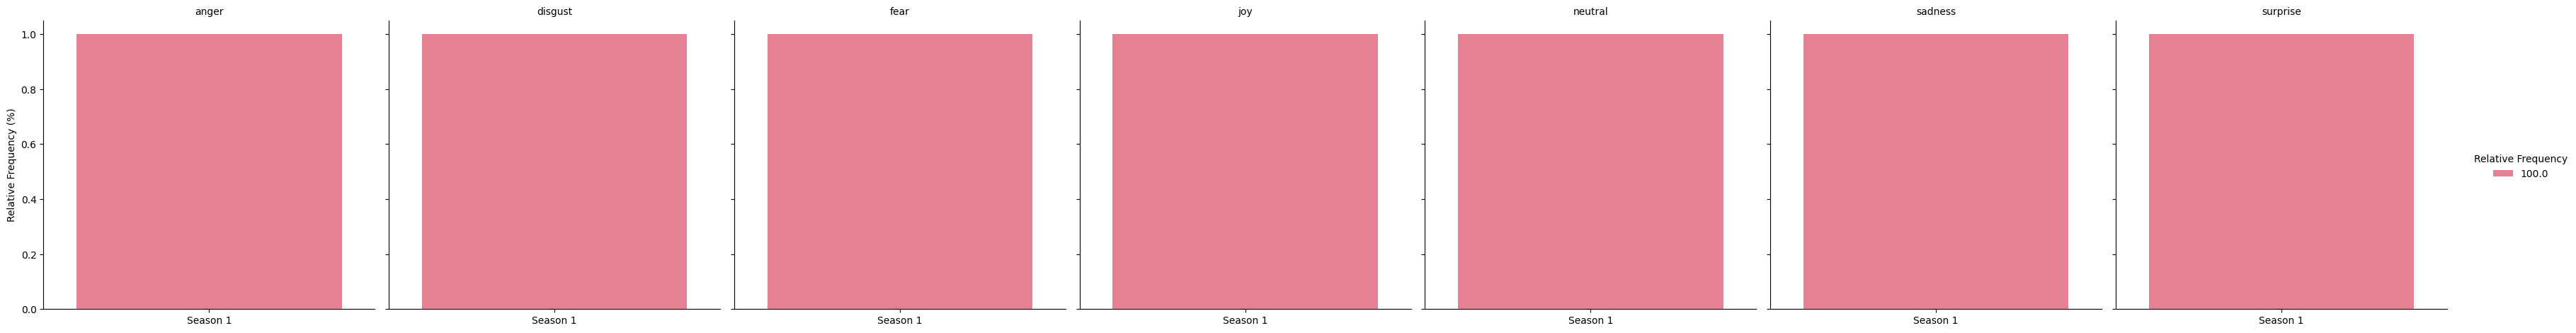

In [31]:
plot_emotion(data3)

     Season predicted_emotion  Relative Frequency
0  Season 1           neutral                47.8
1  Season 1             anger                15.5
2  Season 1          surprise                11.6
3  Season 1           disgust                11.2
4  Season 1           sadness                 6.2
5  Season 1              fear                 3.9
6  Season 1               joy                 3.8


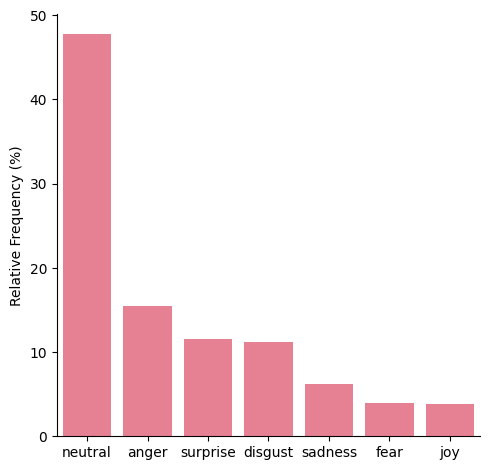

In [18]:
plot_season(data3)

In [13]:
def plot_season(df):
    real_freq = df.groupby('Season')['predicted_emotion'].value_counts(normalize = True) * 100
    real_freq = real_freq.reset_index(name = 'Relative Frequency')

    plot = sns.catplot(data = real_freq, x = "predicted_emotion", y = "Relative Frequency", hue = "Season",
                        kind = "bar", palette = "husl", legend = False, col_wrap = 4)
    plot.set_axis_labels("", "Relative Frequency (%)")
    plot.set_titles("{col_name}")

def plot_emotion(df, outpath):
    real_freq = df.groupby('predicted_emotion')['Season'].value_counts(normalize = True) * 100
    real_freq = real_freq.reset_index(name = 'Relative Frequency')

    #plot = sns.catplot(data = df, x = "Season", hue = "Season", col = "predicted_emotion", kind = "count",
    #                palette = "husl")
    plot = sns.catplot(data = real_freq, x = "Season", y = "Relative Frequency", hue = "predicted_emotion", 
                        kind = "bar", palette = "husl", col_wrap = 4)
    plot.set_axis_labels("", "Relative Frequency (%)")
    plot.set_titles("{col_name}")


In [39]:
def calculate_real_freq(df, groupby_col, count_col):
    real_freq = df.groupby(groupby_col)[count_col].value_counts(normalize=True) * 100
    real_freq = real_freq.reset_index(name='Relative Frequency')
    df = pd.merge(df, real_freq, on = [groupby_col, count_col], how = 'left') 
    return df


In [43]:
def plot_season(df):
    seasons = df['Season'].unique()
    sns.set_context("notebook", font_scale=0.7) # adjust size of x label
    for season in seasons:
        data = df[df['Season'] == season]
        real_freq = calculate_real_freq(data, 'Season', 'predicted_emotion')
        print(real_freq)
        plot = sns.catplot(data = real_freq, x = "predicted_emotion", y = "Relative Frequency", hue = "Season",
                        kind = "bar", palette = "husl", legend = False, col_wrap = 4)
        plot.set_axis_labels("", "Relative Frequency (%)")
        plot.set_titles("{col_name}")

In [44]:
plot_season(data3)

     Release Date    Season     Episode     Episode Title                Name  \
0      2011-04-17  Season 1   Episode 1  Winter is Coming        waymar royce   
1      2011-04-17  Season 1   Episode 1  Winter is Coming                will   
2      2011-04-17  Season 1   Episode 1  Winter is Coming        waymar royce   
3      2011-04-17  Season 1   Episode 1  Winter is Coming                will   
4      2011-04-17  Season 1   Episode 1  Winter is Coming               gared   
...           ...       ...         ...               ...                 ...   
3174   2011-06-19  Season 1  Episode 10    Fire and Blood  daenerys targaryen   
3175   2011-06-19  Season 1  Episode 10    Fire and Blood  daenerys targaryen   
3176   2011-06-19  Season 1  Episode 10    Fire and Blood      mirri maz duur   
3177   2011-06-19  Season 1  Episode 10    Fire and Blood  daenerys targaryen   
3178   2011-06-19  Season 1  Episode 10    Fire and Blood       jorah mormont   

                           

ValueError: Number of rows must be a positive integer, not 0

<Figure size 2000x0 with 0 Axes>

In [37]:
def plot_season(df):
    seasons = df['Season'].unique()
    sns.set_context("notebook", font_scale=0.7) # adjust size of x label
    for season in seasons:
        data = df[df['Season'] == season]
        real_freq = calculate_real_freq(data, 'Season', 'predicted_emotion')

        g = sns.catplot(data=real_freq, x='predicted_emotion', y='Relative Frequency', hue='predicted_emotion',
                        kind='bar', palette='husl', legend=False)
        g.set_axis_labels("Predicted Emotion", "Relative Frequency (%)")
        g.set_titles("{col_name}")

    plt.tight_layout()
    plt.show()

def plot_emotion(df):
    emotions = df['predicted_emotion'].unique()
    sns.set_context("notebook", font_scale=0.7) # adjust size of x label
    for emotion in emotions:
        data = df[df['predicted_emotion'] == emotion]
        real_freq = calculate_real_freq(data, 'predicted_emotion', 'Season')

        g = sns.catplot(data=real_freq, x='Season', y='Relative Frequency', hue='predicted_emotion',
                        kind='bar', palette='husl', legend=False)
        g.set_axis_labels("Season", "Relative Frequency (%)")
        g.set_titles(emotion)

    plt.show()

/tmp/ipykernel_9357/2396332374.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.catplot(data=real_freq, x='predicted_emotion', y='Relative Frequency', hue='predicted_emotion',


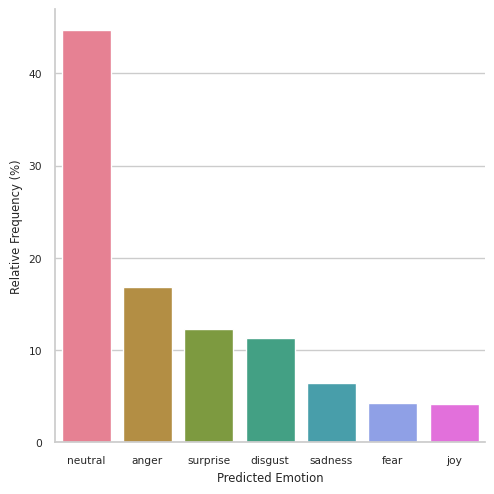

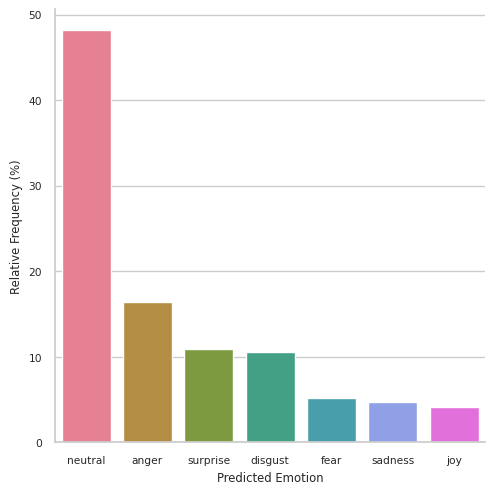

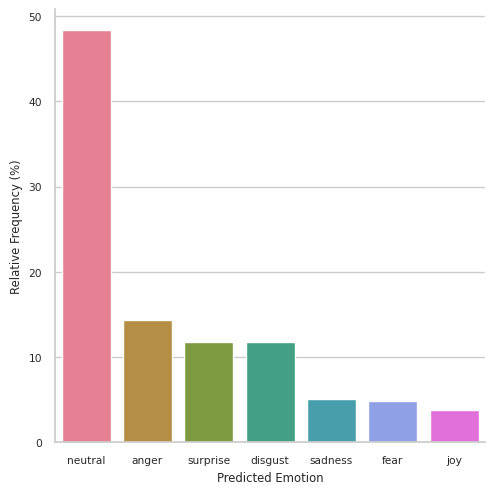

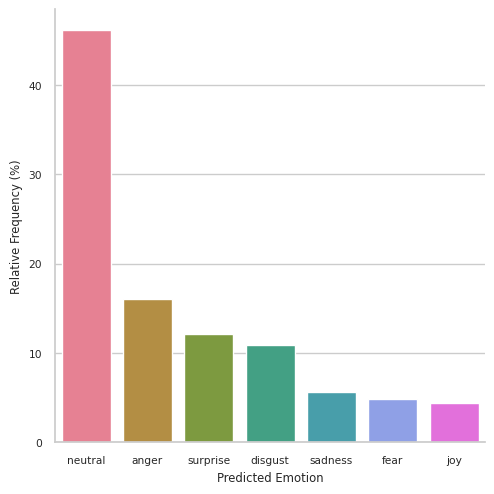

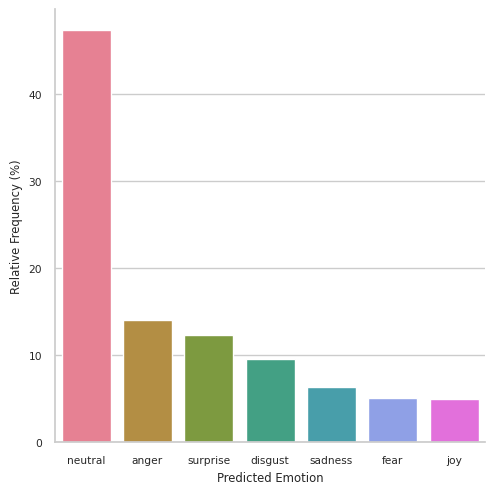

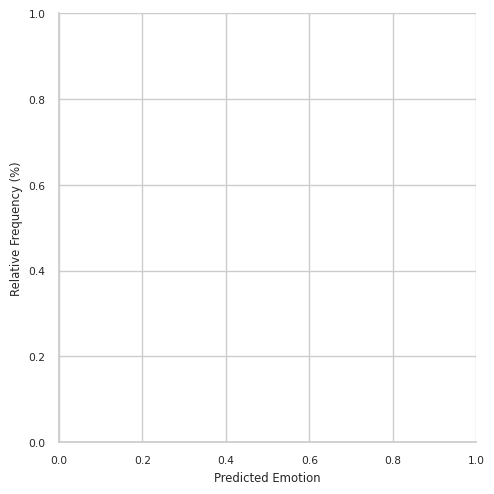

In [38]:
plot_season(data3)